# **Predict Credit Consumption of Customer For  Leading Bank**

### <u>Business  Context :</u>

Analytics driving every industry based on a variety of technology platforms which collect information 
from various sources by analysing what customers certainly want. The Credit Card industry is also 
data rich industry and data can be leveraged in infinite ways to understand customer behaviour. 
 
The data from a credit card processor shows the consumer types and their business spending 
behaviours. Therefore, companies can develop the marketing campaigns that directly address 
consumers’ behaviour. In return, this helps to make better sales and the revenue undoubtedly grows 
greater sales. 
 
Understanding the consumption pattern for credit cards at an individual consumer level is important 
for customer relationship management. This understanding allows banks to customize for 
consumers and make strategic marketing plans. Thus it is imperative to study the relationship 
between the characteristics of the consumers and their consumption patterns. 

### <u>Business Objectives :</u>

One of the leading banks provided below data 
1. Customer Demographics 
2. Customer Behavioural data (information on liabilities, assets and history of transactions with the bank for each customer). Data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend  in the coming 3 months (July, August & September) 
3. Credit consumption 

### Import required libraries and packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
# Set the Pandas display options to show all columns without truncation
pd.set_option('display.max_columns', None)

### Load data set

In [2]:
# Read data from Excel files into Pandas DataFrames
credit_consumption = pd.read_excel('data/CreditConsumptionData.xlsx')
customer_behaviour = pd.read_excel('data/CustomerBehaviorData.xlsx') 
customer_demographics = pd.read_excel('data/CustomerDemographics.xlsx')

In [3]:
#  first 5 rows of credit_consumption dataframe
credit_consumption.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [4]:
# first 5 rows of credit_beahviour dataframe
customer_behaviour.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [5]:
#first 5 rows of credit_demographics dataframe
customer_demographics.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [6]:
# merge data frames on 'ID' variable and name it customer_credit
customer_data = pd.merge(customer_behaviour, customer_demographics, on = 'ID', how='inner')
customer_credit = pd.merge(customer_data, credit_consumption, on='ID', how='inner')
customer_credit.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,current,M,30,MEDIUM,7.0,5,956.0,1,20.0,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,current,M,37,LOW,10.2,8,966.0,1,5.0,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,current,M,33,MEDIUM,3.9,3,505.0,1,15.0,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,current,M,63,LOW,25.8,6,631.0,0,15.0,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0,16394.0


In [7]:
#  display rows and columns in customer_credit
print(f"No. of rows : {customer_credit.shape[0]}")
print(f"No. of columns : {customer_credit.shape[1]}")

No. of rows : 20000
No. of columns : 49


In [8]:
# brief information  about merged dataframe
customer_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons_apr                   20000 non-null  float64
 2   dc_cons_apr                   20000 non-null  float64
 3   cc_cons_may                   19999 non-null  float64
 4   dc_cons_may                   20000 non-null  float64
 5   cc_cons_jun                   20000 non-null  float64
 6   dc_cons_jun                   19999 non-null  float64
 7   cc_count_apr                  19999 non-null  float64
 8   cc_count_may                  20000 non-null  int64  
 9   cc_count_jun                  20000 non-null  int64  
 10  dc_count_apr                  20000 non-null  int64  
 11  dc_count_may                  20000 non-null  int64  
 12  dc_count_jun                  20000 non-null  int64  
 13  c

### Preprocessing 

In [9]:
# remove duplicates 
customer_credit.drop_duplicates(inplace=True)

In [10]:
# for consistent naming convert  all letter in feature names to lower case
customer_credit.columns = customer_credit.columns.str.lower()

In [11]:
# check for missing values 
customer_credit.isnull().sum()

id                                 0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
d

In [12]:
# Create a separate DataFrame for rows with null 'cc_cons' values
predict_target_df = customer_credit[customer_credit['cc_cons'].isnull()]

# save dataframe 
predict_target_df.to_csv('predict_target_df.csv', index=False)

In [13]:
# drop missing values 
customer_credit.dropna(inplace=True)
customer_credit.isnull().sum()

id                              0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_m

### Exploratory data analysis 

summery statistics 

In [14]:
customer_credit.describe(percentiles=(0.25, 0.5, 0.75, 0.99)).T

,count,mean,std,min,25%,50%,75%,99%,max
id,14995.0,10032.128443,5.760866e+03,1.00,5058.500,10055.00,15015.500,1.980406e+04,19998.00
cc_cons_apr,14995.0,17960.830861,2.519132e+04,253.00,4411.590,10288.10,21407.625,1.238253e+05,441031.33
dc_cons_apr,14995.0,8171.498747,1.477513e+04,19.35,1634.000,3994.80,9339.020,6.480400e+04,229255.00
cc_cons_may,14995.0,16338.688883,2.706498e+04,157.00,3638.000,8694.00,18951.300,1.264722e+05,1117246.31
dc_cons_may,14995.0,7702.797188,1.898898e+04,22.00,1643.500,3821.00,8212.000,6.479424e+04,911223.49
cc_cons_jun,14995.0,12130.345532,1.849140e+04,65.00,3004.500,6655.25,14247.000,8.696523e+04,382914.10
dc_cons_jun,14995.0,7098.205684,1.325377e+04,62.00,1358.000,3327.00,7597.000,7.163800e+04,233384.00
cc_count_apr,14995.0,41.492631,9.744751e+01,1.00,5.000,10.00,44.000,5.310000e+02,531.00
cc_count_may,14995.0,33.488296,4.954749e+01,1.00,8.000,23.00,43.000,1.280000e+02,601.00
cc_count_jun,14995.0,41.496699,4.734729e+01,1.00,10.000,35.00,61.000,1.350000e+02,653.00


In [15]:
# remove columns with Standard deviation  0, and 'id'
columns_to_drop = ['id','personal_loan_active',	'vehicle_loan_active',	'personal_loan_closed', 'vehicle_loan_closed']
customer_credit.drop(columns=columns_to_drop, inplace=True)
customer_credit.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,account_type,gender,age,income,emp_tenure_years,tenure_with_bank,region_code,netbanking_flag,avg_days_between_transaction,cc_cons
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,current,M,30,MEDIUM,7.0,5,956.0,1,20.0,13434.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,current,M,37,LOW,10.2,8,966.0,1,5.0,449.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,current,M,33,MEDIUM,3.9,3,505.0,1,15.0,11968.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,current,M,63,LOW,25.8,6,631.0,0,15.0,32029.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0,16394.0


#### Univariate Analysis

In [16]:
# seperate numerical and categorical columns 
categorical_features = customer_credit.select_dtypes(include=[object]).columns.tolist()
categorical_features.append('netbanking_flag')
numerical_features = customer_credit.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('netbanking_flag')

Distribution of all numerical columns 

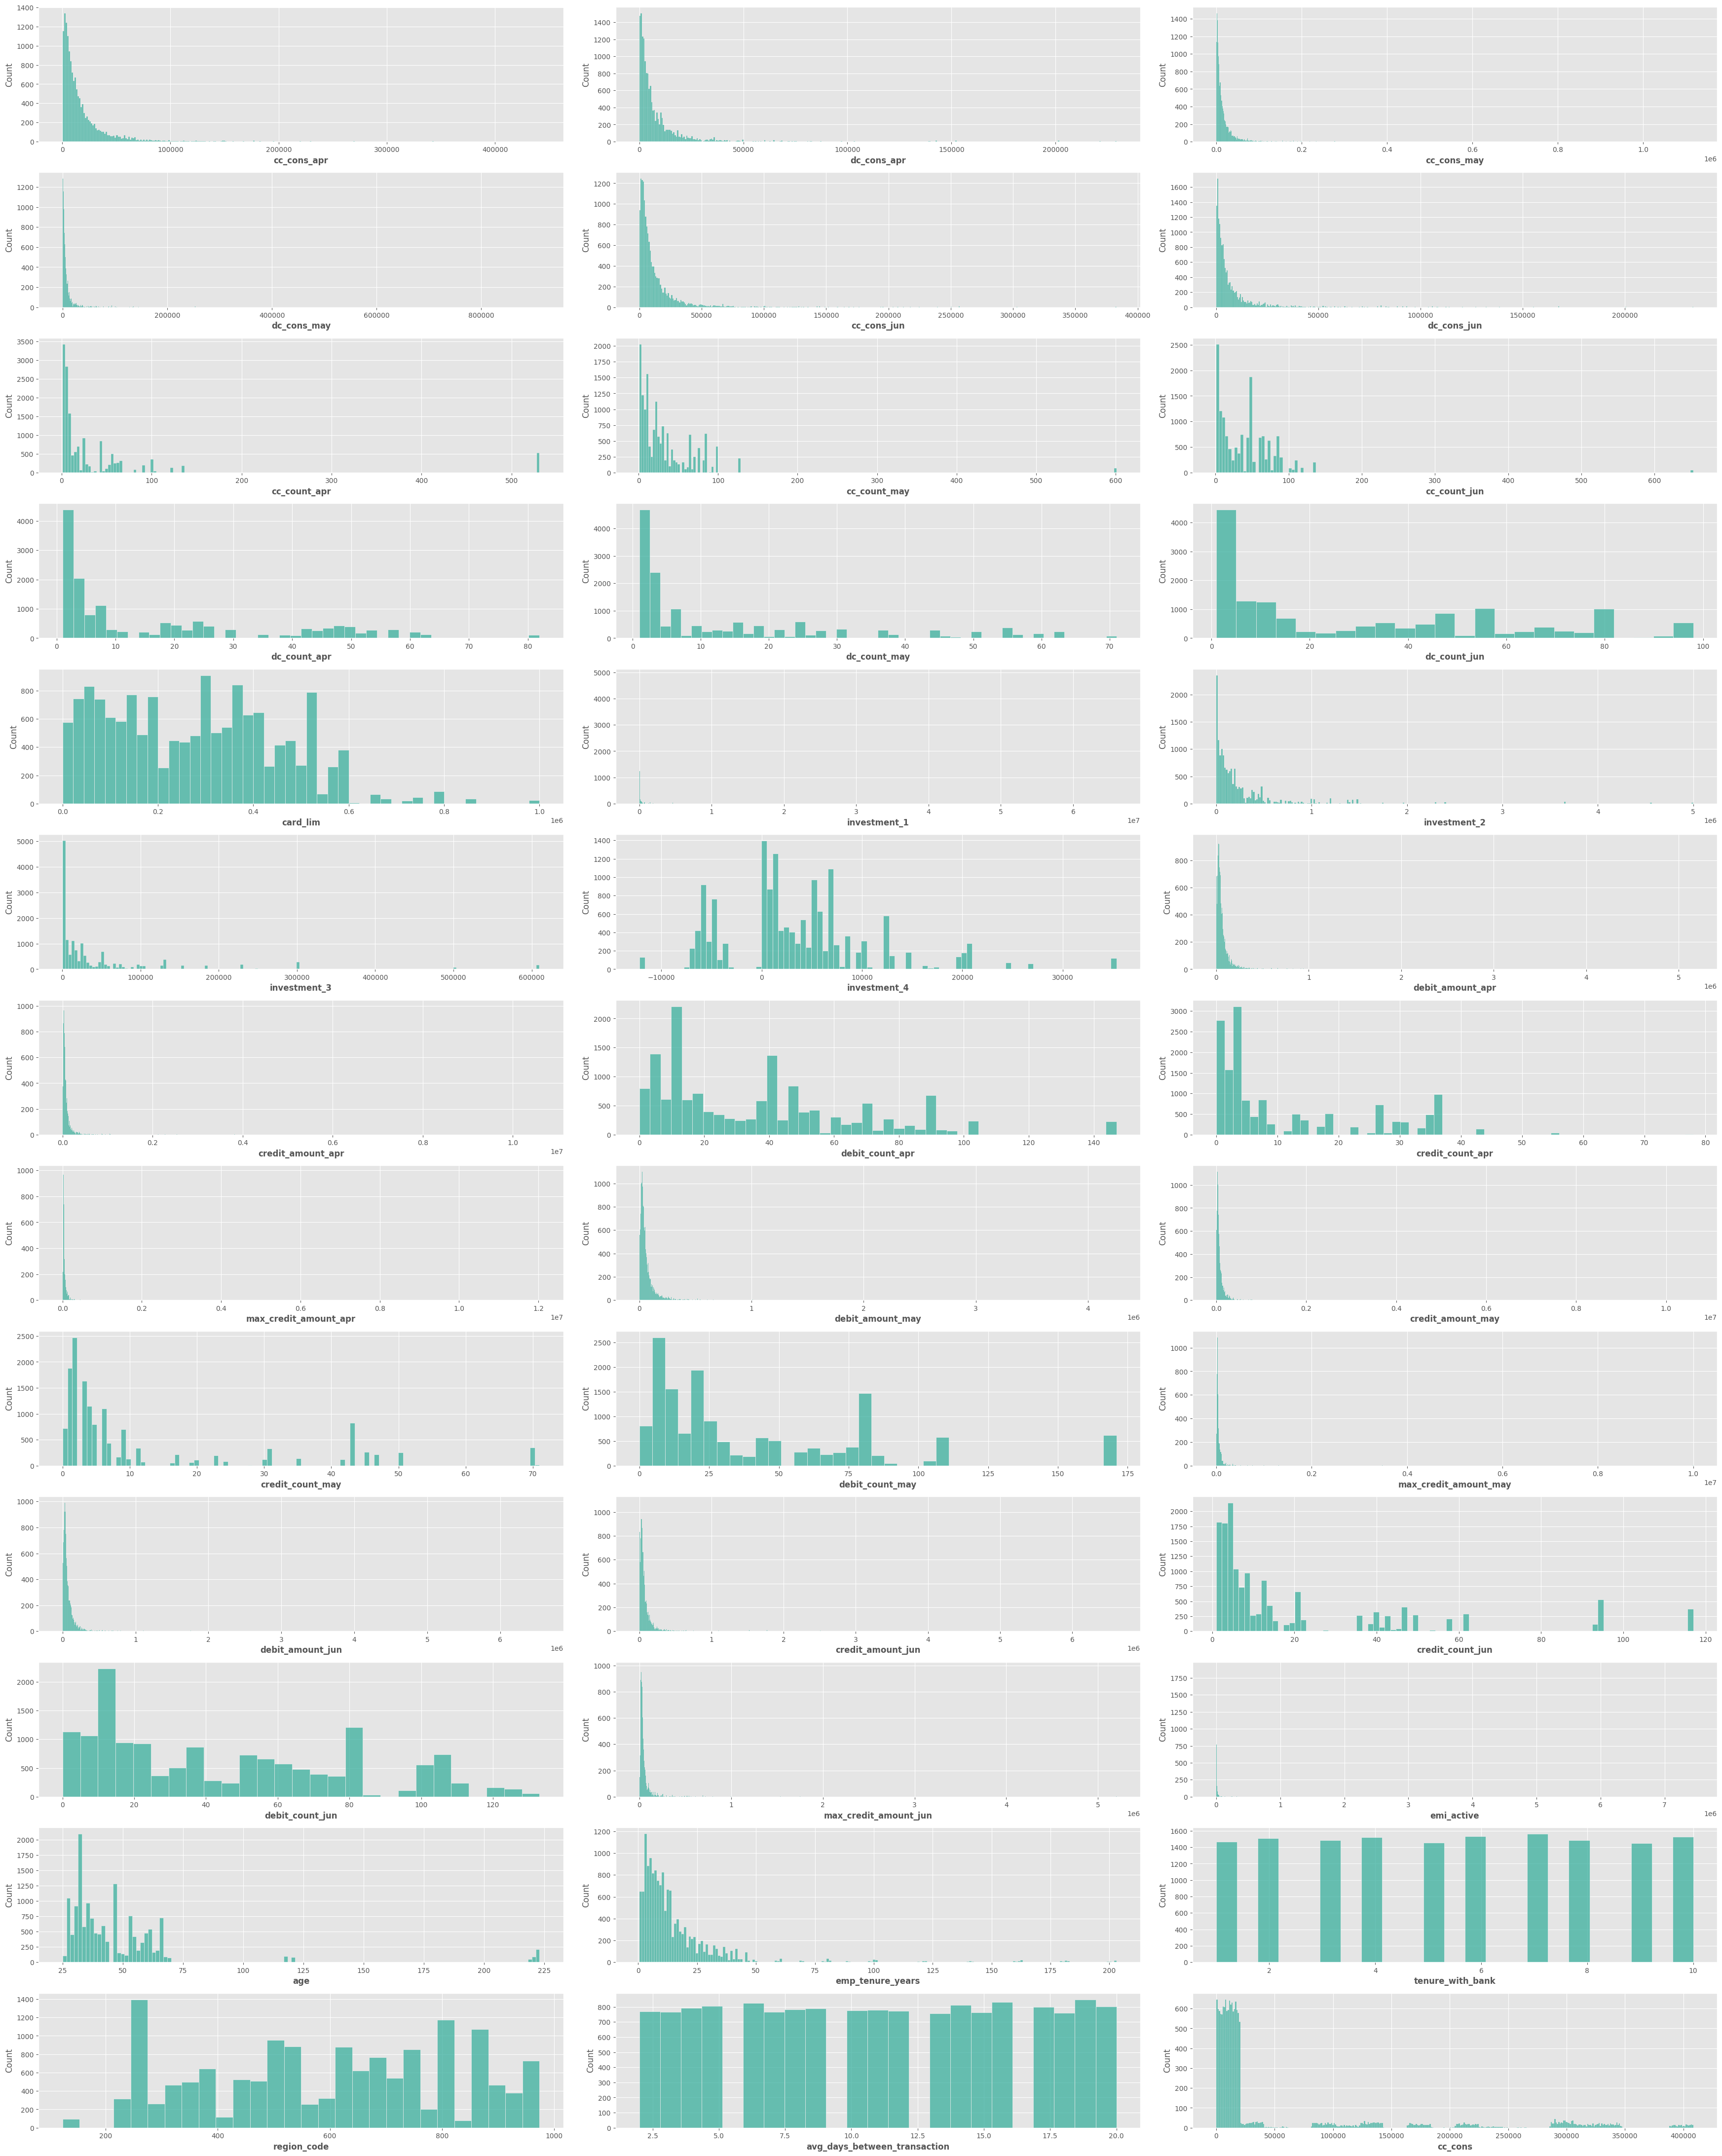

In [17]:
# Create a 8x3 grid of subplots
fig, axes = plt.subplots(15, 3, figsize=(35,50)) 

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create distribution plots
for i in range(len(numerical_features)):
    sns.histplot(customer_credit[numerical_features[i]], ax=axes[i], kde=False,color='#3ab09e')
    axes[i].set_xlabel(f'{numerical_features[i]}', fontweight='bold')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
# Show the plot
plt.show()

Violinplot

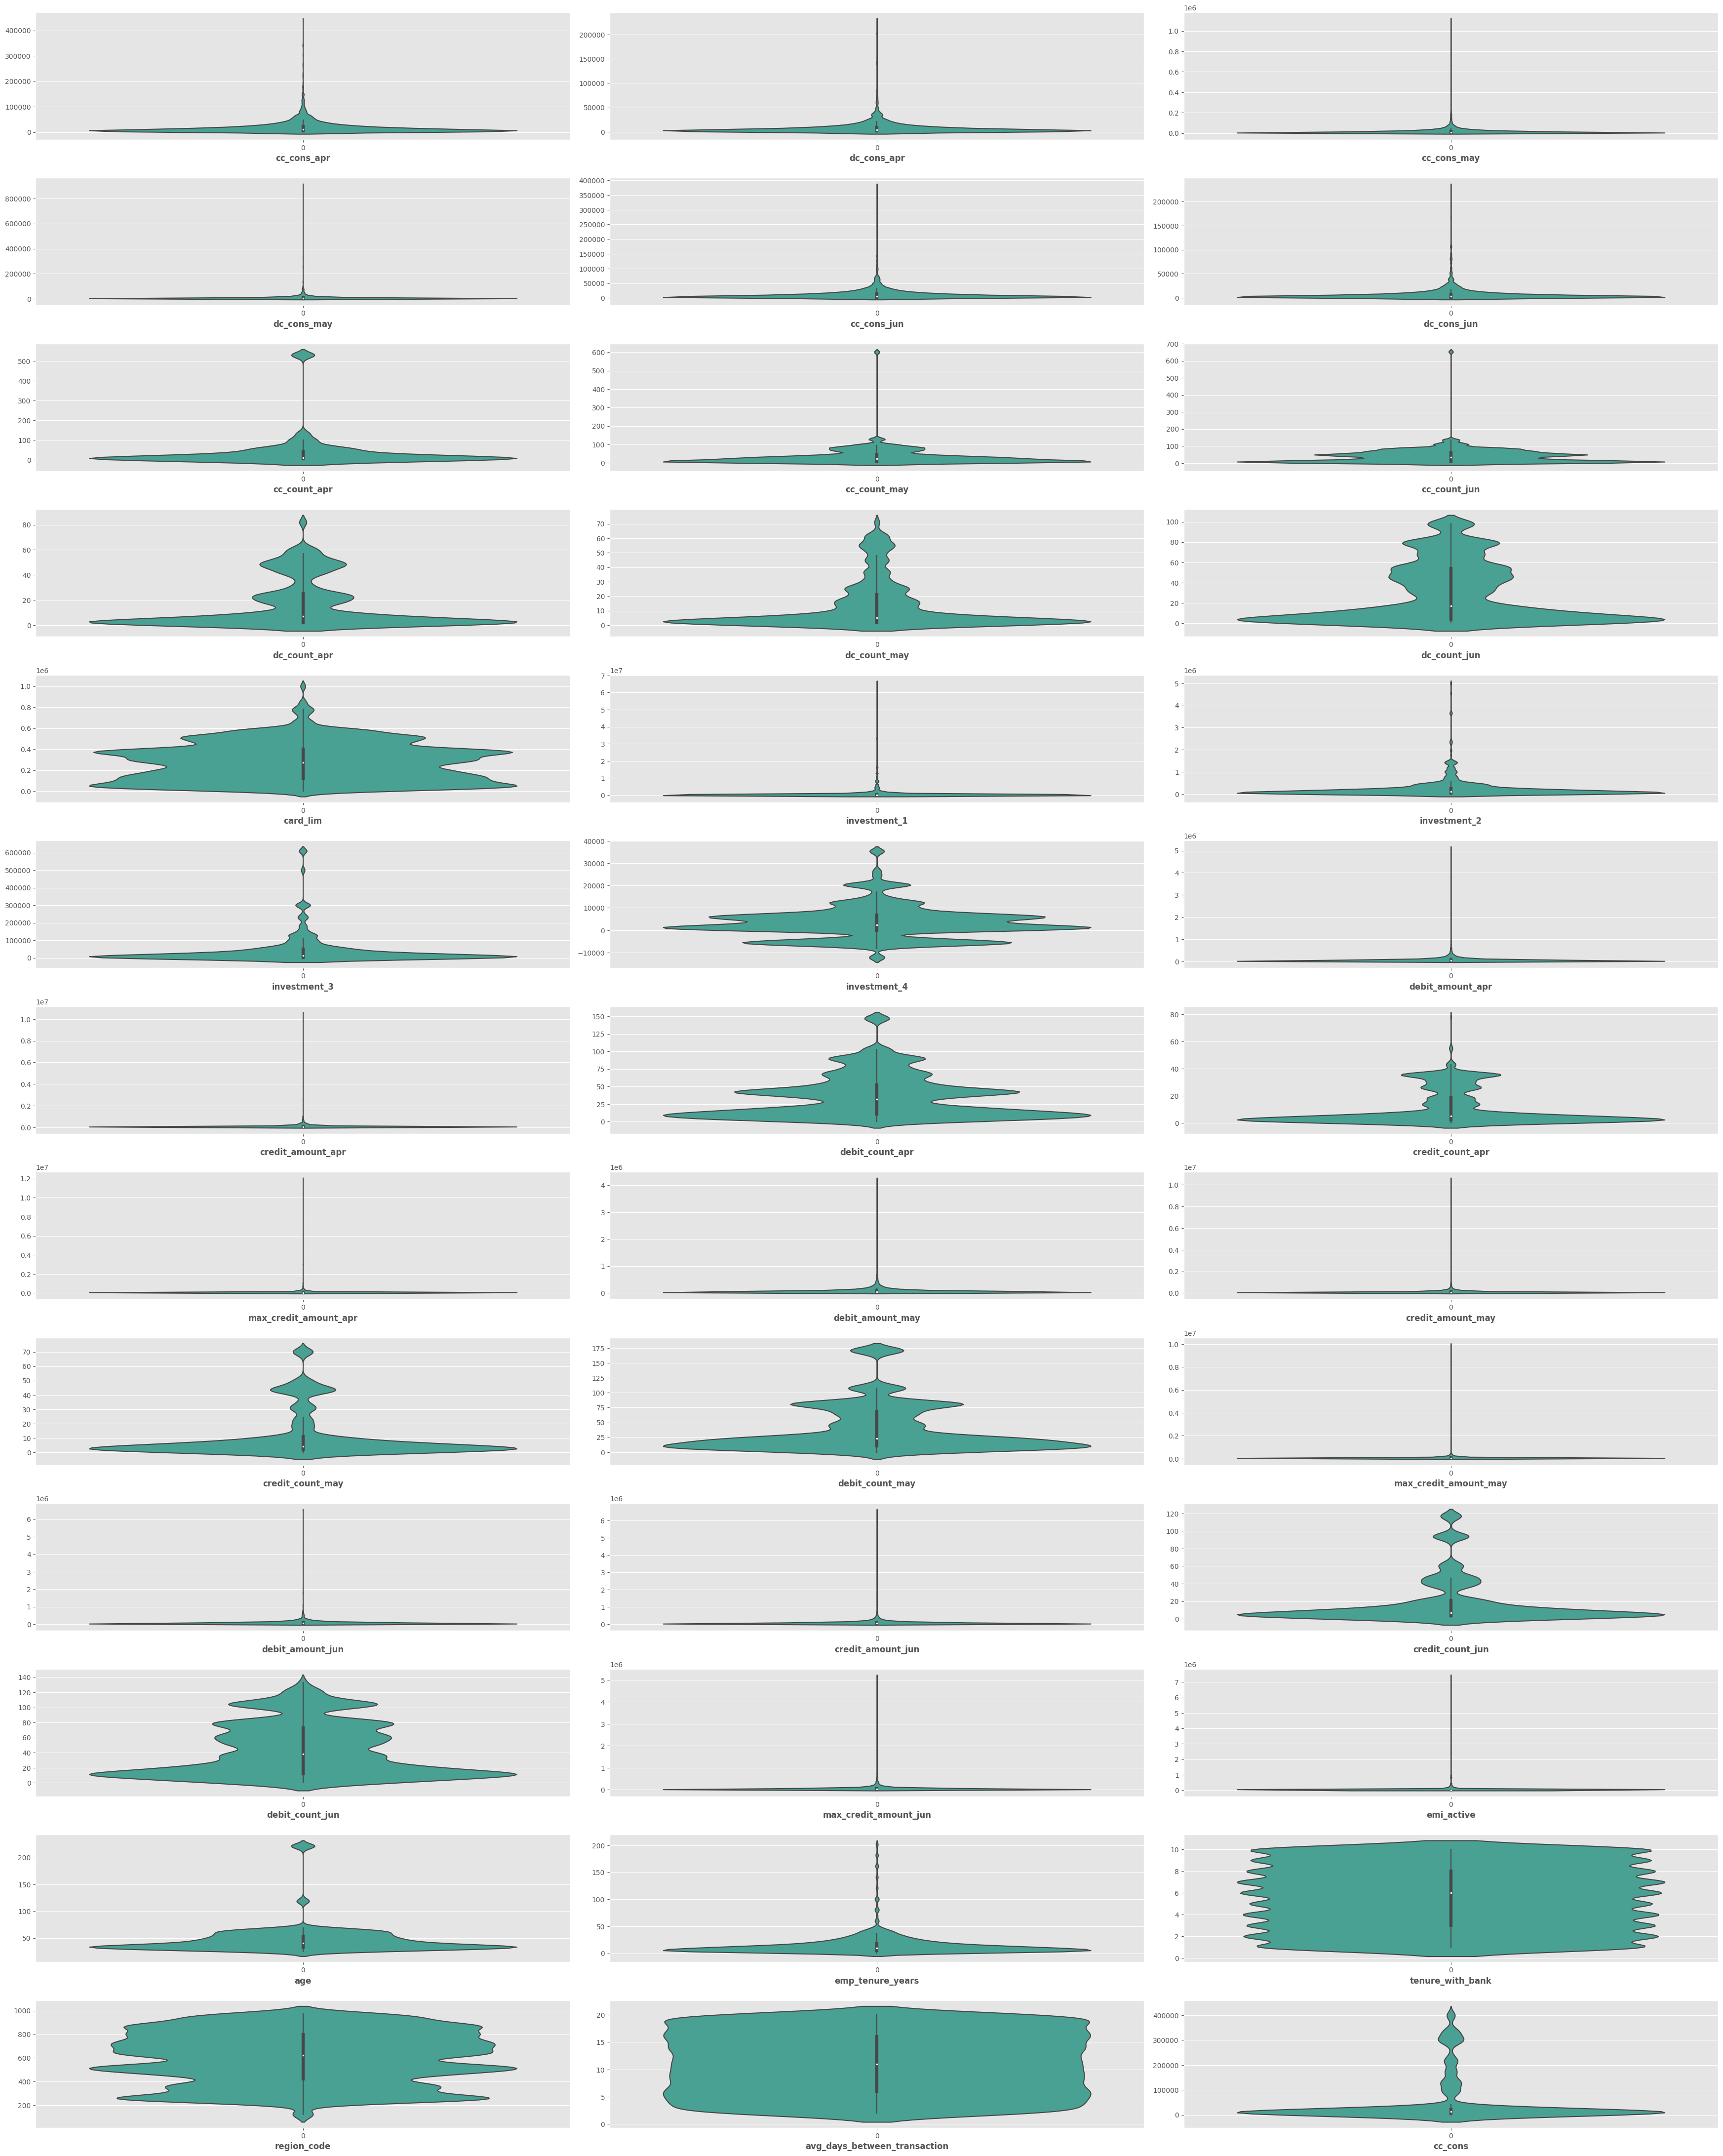

In [18]:
# Create a 8x3 grid of subplots
fig, axes = plt.subplots(15, 3, figsize=(35,50)) 

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create distribution plots
for i in range(len(numerical_features)):
    sns.violinplot(customer_credit[numerical_features[i]], ax=axes[i], color='#3ab09e')
    axes[i].set_xlabel(f'{numerical_features[i]}', fontweight='bold')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
# Show the plot
plt.show()

#### Credit consumption vs Age

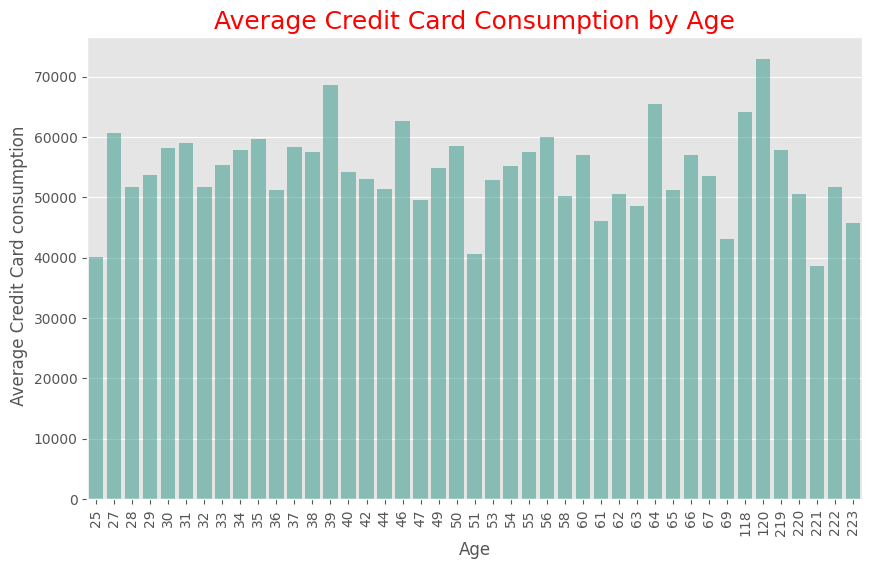

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_credit,
             x='age',
             y='cc_cons',
             color='#3ab09e',
             alpha=0.6,
             errorbar=None
             )
plt.title('Average Credit Card Consumption by Age', fontsize=18, color='red')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel(' Average Credit Card consumption')
plt.show()

###  Average credit card consumption by Gender

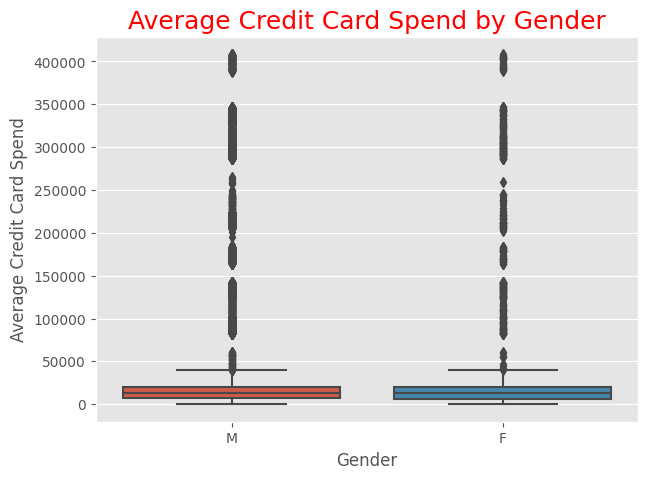

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(data=customer_credit, x='gender', y='cc_cons')
plt.title('Average Credit Card Spend by Gender', fontsize=18, color='red')
plt.xlabel('Gender')
plt.ylabel('Average Credit Card Spend')
plt.show()

we can see average credit consumption for both gender are identical

#### Average credit consumption by Gender and Income level

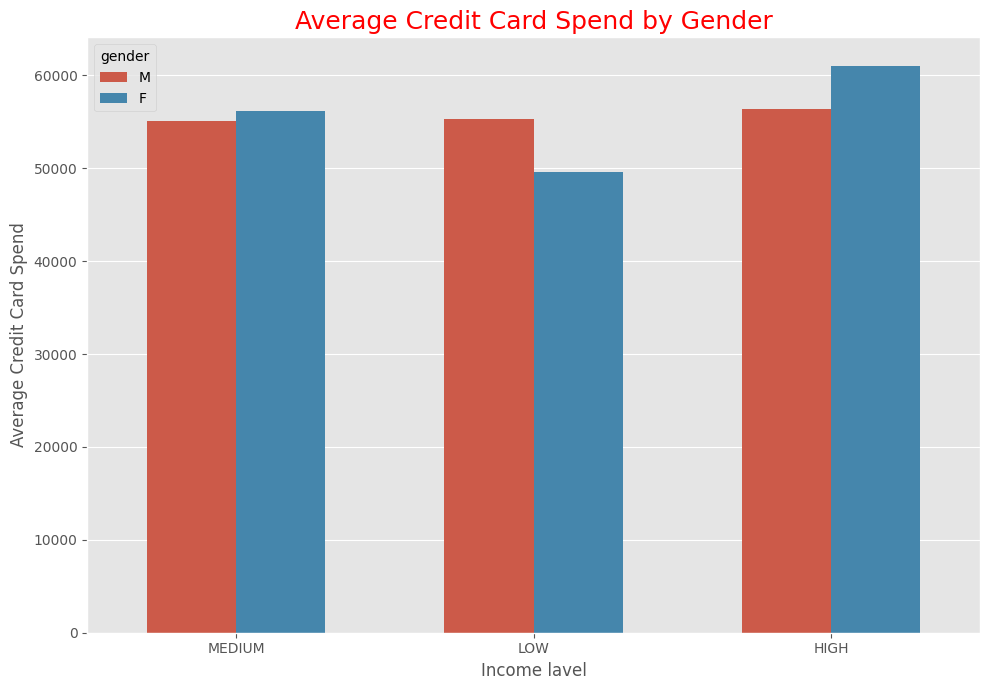

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(data=customer_credit, x='income', y='cc_cons', hue='gender', errorbar=None, width=0.6)
plt.title('Average Credit Card Spend by Gender', fontsize=18, color='red')
plt.xlabel('Income lavel')
plt.ylabel('Average Credit Card Spend')
plt.tight_layout()
plt.show()

Credit card consmption by Employee tenure years 

In [22]:
# Number of quantiles or bins
num_bins = 4

# Specify custom labels for the bins
bin_labels = ['young_professionals', 'mid_level','experienced','senior']

# Create bins using the qcut function with custom labels
customer_credit['emp_tenure_bin'], bin_edges = pd.qcut(customer_credit['emp_tenure_years'], num_bins, labels=bin_labels, retbins=True)


In [23]:
customer_credit[['emp_tenure_years', 'emp_tenure_bin']].head()

,emp_tenure_years,emp_tenure_bin
0,7.0,mid_level
1,10.2,experienced
2,3.9,young_professionals
3,25.8,senior
4,6.5,mid_level


In [34]:
customer_credit.emp_tenure_years.min()

0.5

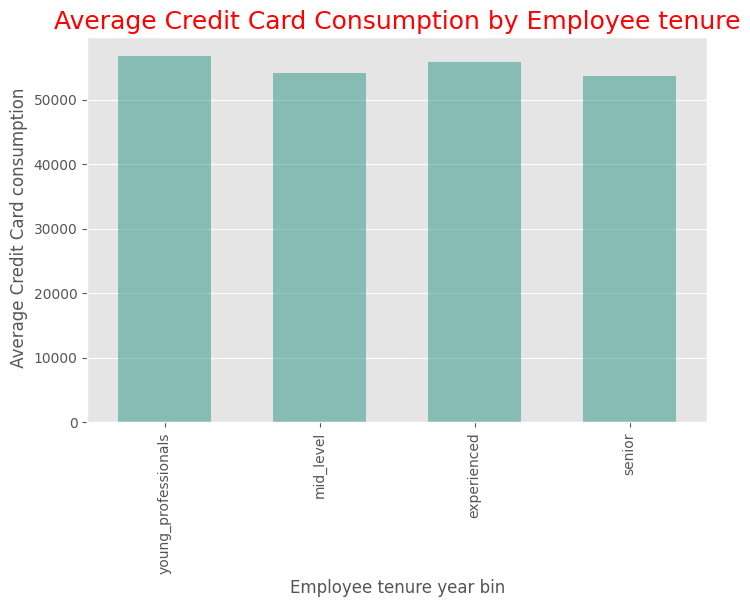

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_credit,
             x='emp_tenure_bin',
             y='cc_cons',
             color='#3ab09e',
             alpha=0.6,
             errorbar=None,
             width=0.6
             )
plt.title('Average Credit Card Consumption by Employee tenure', fontsize=18, color='red')
plt.xlabel('Employee tenure year bin')
plt.xticks(rotation=90)
plt.ylabel(' Average Credit Card consumption')
plt.show()

Net banking and Credit card consumption 

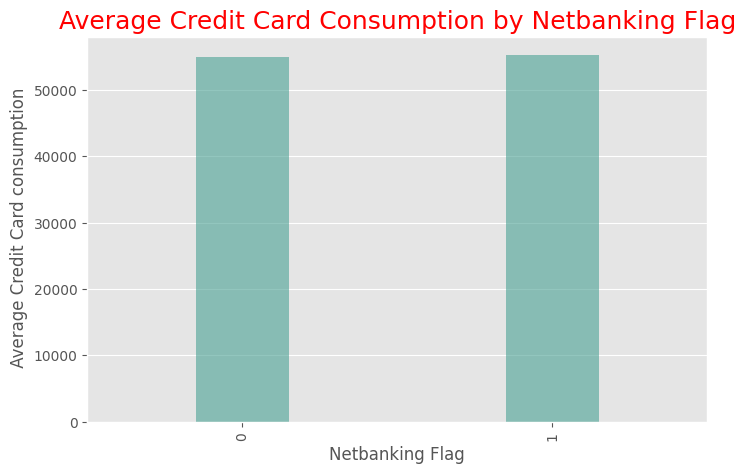

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_credit,
             x='netbanking_flag',
             y='cc_cons',
             color='#3ab09e',
             alpha=0.6,
             errorbar=None,
             width=0.3
             )
plt.title('Average Credit Card Consumption by Netbanking Flag', fontsize=18, color='red')
plt.xlabel('Netbanking Flag')
plt.xticks(rotation=90)
plt.ylabel(' Average Credit Card consumption')
plt.show()

Average credit card consumption by Tenure with bank 

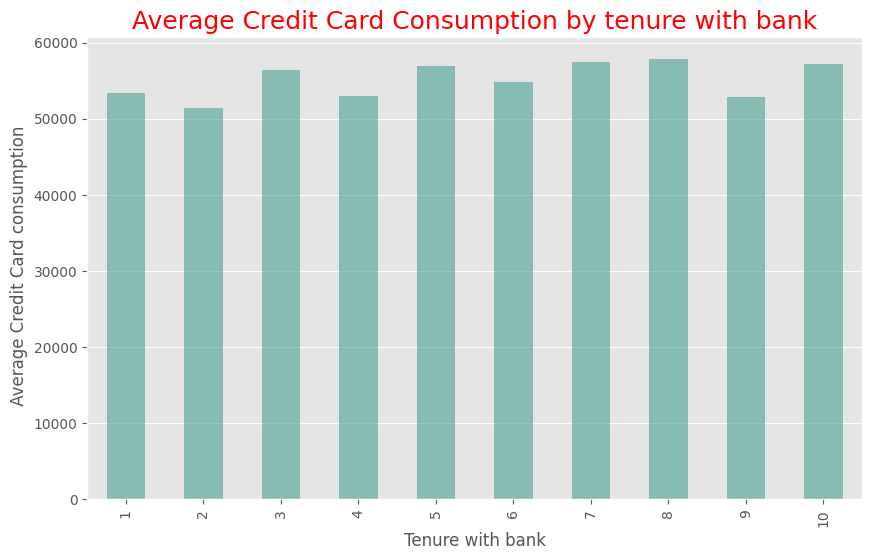

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_credit,
             x='tenure_with_bank',
             y='cc_cons',
             color='#3ab09e',
             alpha=0.6,
             errorbar=None,
             width=0.5
             )
plt.title('Average Credit Card Consumption by tenure with bank', fontsize=18, color='red')
plt.xlabel('Tenure with bank')
plt.xticks(rotation=90)
plt.ylabel(' Average Credit Card consumption')
plt.show()

#### Correlation between features 

In [28]:
correlation_matrix = customer_credit.corr()
correlation_matrix

C:\Users\aksha\AppData\Local\Temp\ipykernel_10264\2285752231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_credit.corr()


,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,age,emp_tenure_years,tenure_with_bank,region_code,netbanking_flag,avg_days_between_transaction,cc_cons
cc_cons_apr,1.000000,0.000424,0.004866,0.001700,0.006455,-0.004045,-0.003305,0.011592,0.008624,0.002177,-0.003454,0.010601,0.009560,0.009029,-0.001656,-0.000682,-0.000423,-0.001371,0.005397,0.001597,0.000318,-0.007756,-0.000470,0.000302,-0.003277,0.003175,-0.002160,0.001628,-0.008493,-0.007551,0.012934,-0.004237,0.001385,0.007914,0.005343,-0.007042,0.006876,0.003358,0.009451,0.006155
dc_cons_apr,0.000424,1.000000,0.004190,-0.008105,0.003870,-0.006128,0.004364,-0.000569,0.005961,0.005787,-0.001154,0.006819,-0.010311,0.003168,-0.005496,-0.014172,0.006047,-0.001911,0.006305,-0.002986,-0.005446,-0.008338,-0.009160,0.009189,0.001787,0.000788,0.004429,-0.002516,-0.007276,-0.005842,-0.002319,-0.017933,0.000660,0.017386,0.015714,-0.007406,-0.010650,-0.006446,0.009859,-0.000144
cc_cons_may,0.004866,0.004190,1.000000,-0.009344,-0.010222,-0.000034,-0.010120,-0.001661,-0.011622,-0.006700,-0.012476,-0.004818,-0.006753,0.001253,-0.002065,0.005669,0.005260,0.003626,-0.003450,0.015127,-0.017907,0.006686,0.002392,0.009962,-0.004055,-0.000323,0.009455,-0.005010,0.009121,0.002005,-0.014656,-0.004091,0.000926,-0.001618,-0.004802,0.012951,-0.010801,-0.002150,0.013302,0.021807
dc_cons_may,0.001700,-0.008105,-0.009344,1.000000,-0.005547,0.003460,0.003125,0.005391,-0.003462,-0.018845,0.004732,-0.004768,-0.006437,-0.005487,0.000886,-0.008694,0.011066,0.001169,0.013712,-0.016633,-0.010343,-0.004974,0.015539,-0.010443,-0.003587,-0.002408,0.022023,-0.002776,-0.004941,-0.012930,0.004631,0.001912,-0.003986,-0.004397,-0.001117,0.000614,0.006663,0.006830,0.003469,-0.000572
cc_cons_jun,0.006455,0.003870,-0.010222,-0.005547,1.000000,0.001526,0.002900,0.002713,0.010128,-0.010103,-0.006121,0.000950,0.000396,-0.010146,0.007196,-0.003167,-0.001186,-0.002520,-0.004983,-0.009734,-0.013122,-0.002313,0.010023,-0.005947,-0.010120,-0.009084,-0.002482,0.010539,0.008264,0.002414,0.013962,0.002779,-0.002007,-0.013378,-0.015885,-0.012832,-0.007976,-0.002432,0.001769,-0.000838
dc_cons_jun,-0.004045,-0.006128,-0.000034,0.003460,0.001526,1.000000,-0.008349,0.003363,0.004645,0.004491,-0.000126,0.004951,0.001277,-0.011075,0.008649,-0.001121,0.007692,-0.014205,-0.000110,-0.004599,0.006833,-0.002529,-0.002630,-0.007133,-0.006412,-0.010719,-0.003727,-0.012845,-0.006079,0.011602,-0.005735,-0.005209,0.002408,0.008624,0.015976,-0.005168,0.011812,0.000821,-0.005112,0.002875
cc_count_apr,-0.003305,0.004364,-0.010120,0.003125,0.002900,-0.008349,1.000000,-0.001842,0.009122,-0.005773,-0.009612,0.000813,-0.003085,-0.002063,-0.009052,-0.003589,-0.002901,0.000605,0.000249,0.000990,0.003539,-0.000097,-0.000865,0.001021,0.013536,0.004950,-0.003431,-0.006379,0.000297,-0.001313,-0.019547,-0.014175,-0.006129,0.004967,0.009160,0.012005,-0.003767,0.012864,-0.015893,-0.009759
cc_count_may,0.011592,-0.000569,-0.001661,0.005391,0.002713,0.003363,-0.001842,1.000000,-0.003845,0.004400,-0.000179,-0.003548,0.006136,-0.005675,0.004231,0.003019,0.002545,0.000011,0.004904,0.004484,-0.007399,-0.003766,-0.004598,0.006575,0.010785,0.026173,0.043764,-0.002185,-0.002976,0.009212,-0.002209,0.002033,-0.013143,0.000101,-0.003471,-0.010355,0.010383,0.004880,0.007117,0.016342
cc_count_jun,0.008624,0.005961,-0.011622,-0.003462,0.010128,0.004645,0.009122,-0.003845,1.000000,-0.002566,-0.005923,0.010343,-0.003500,0.013421,-0.005808,-0.009304,0.003172,-0.000499,0.001323,0.018070,-0.004871,0.001187,0.006205,-0.003314,-0.015721,-0.002562,-0.

#### Correlation heatmap


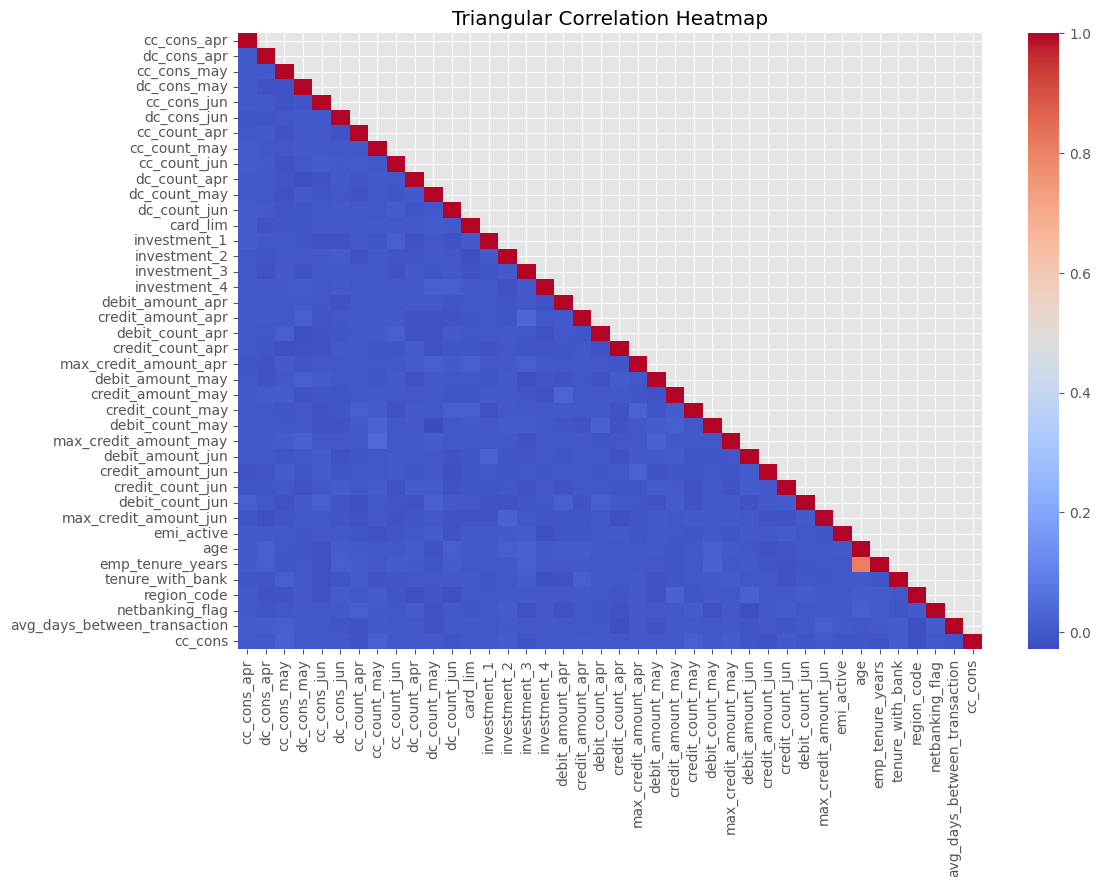

In [29]:
# Create a mask for the upper triangle
mask = np.triu(np.ones(correlation_matrix.shape), k=1)

# plot the correlation matrix 
plt.figure(figsize=(12, 8 ))

# create a triangular heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False)
plt.title("Triangular Correlation Heatmap")
plt.show()

In [31]:
# correlation of features with target 
correlation_matrix['cc_cons'].sort_values(ascending=False)


cc_cons                         1.000000
cc_cons_may                     0.021807
cc_count_may                    0.016342
credit_count_may                0.013445
tenure_with_bank                0.011467
investment_2                    0.008859
max_credit_amount_may           0.008536
max_credit_amount_jun           0.007876
dc_count_may                    0.007668
cc_cons_apr                     0.006155
credit_amount_apr               0.005290
credit_count_jun                0.005170
investment_1                    0.004084
debit_amount_apr                0.003941
dc_cons_jun                     0.002875
investment_4                    0.001902
netbanking_flag                 0.001558
dc_cons_apr                    -0.000144
debit_count_may                -0.000379
dc_cons_may                    -0.000572
debit_amount_may               -0.000593
dc_count_apr                   -0.000780
cc_cons_jun                    -0.000838
debit_count_apr                -0.001492
cc_count_jun    